In [1]:
# This is for Lab04 of COMP9517

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Q1 watershed doing the segmentation of the ball picture

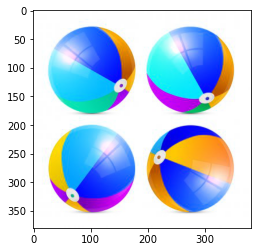

In [3]:
# Reading the bgr image from the dir
image_input = cv2.imread('./ball_set.jpg')
plt.imshow(image_input)

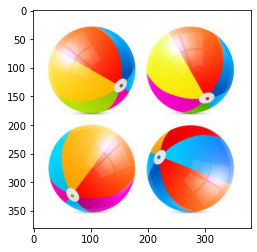

In [4]:
# change the color to rgb
# This is for question 2 MeanShift
image_rgb = cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

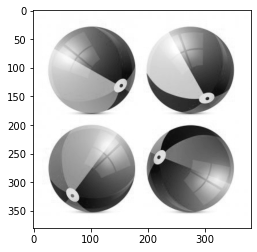

In [5]:
# Change the rgb image to gray image
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
# img_gray = (255-img_gray)
plt.imshow(image_gray,'gray')

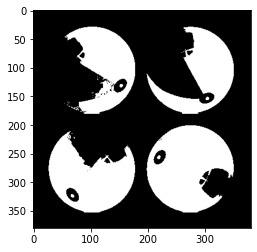

In [8]:
# Watershed needs the binary image which need the cv2.threshold
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

# Otsu’s Binarization
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

# This 169 is for filtering the color gray
ret, image_thresh = cv2.threshold(image_gray,0 ,169 , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU,cv2.THRESH_BINARY)
plt.imshow(image_thresh, 'gray')

In [9]:
# Start using the watershed Algorithm
# Some of the codes are from the following sample provided by the instruction of Lab04
# Source: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

In [16]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

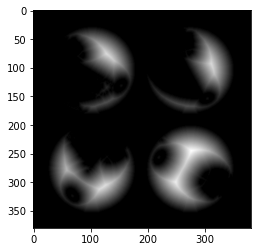

In [17]:
# This method is used to calculate the Euclidean distance
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html
distance = ndi.distance_transform_edt(image_thresh)
# Show the image of Euclidean distance
plt.imshow(distance, 'gray')

In [18]:
# Finding local maximum by using peak_local_max
# Source: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html
local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)

<ipython-input-18-c8db5cc0eac7>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)


In [21]:
# Getting the maximum points and tag the labels 
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html
# Getting the first part of the output
markers = ndi.label(local_max_point)[0]

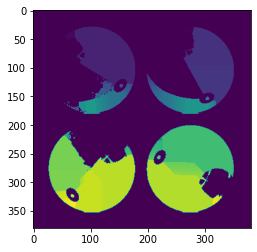

In [22]:
# Getting the labeled image based on the markers
labels = watershed(-distance, markers, mask=image_thresh)
plt.imshow(labels)